<a href="https://colab.research.google.com/github/Tusharsankhla18/Course_Recommemdation_System/blob/main/Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recommendation System :

A Recommendation System is a system that seeks to predict or filter preferences according to the user's choices. The created Web App user interface using Python
(Streamlit) is a similar system, which suggest courses based on the user's liked or  searched course.

Recommendation System are of two types:

1. Content Based Filtering System:
2. Collaborative Filtering:

#System Overview:
⚫ In this course recommendation system, content-based similarity filtering based
   on the course tags which the users either watch or search is being used.

⚫ The Dataset used is of the Coursera Courses Dataset which contains over  
   3,000 courses

# Dataset Information:
1. Course Name - This column describes the name of course.
2. University - This column describes from which university the course is being
associated.
3. Difficulty Level - This column describes the difficulty of the courses.
      
      Categories as - Beginner, Intermediate, Advanced, Conversant.
4. Course Rating- This column describes the rating(on the scale of 5.0) of the course given by the users.
5. Course URL - This column describes the URL link of the course.
6. Course Description - This column describes the a brief descriotion of the course.
7. Skills - This column Describes the skills associated with the course.

# Algorithm to be used in the project:

1. Cosine Similarity :

2. Linear Similarity :    

# Workflow of the project :

1. Dataset

2. Vectorized the Dataset

3. Cosine Similarity Matrix

4. ID,Score

5. Recommendation

# Importing the dependencies (Libraries) of the project:

In [41]:
! pip install neattext


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.7/114.7 kB 5.1 MB/s eta 0:00:00


In [42]:
# IMPORTING EXPLORATORY DATA ANALYSIS LIBRARIES
import pandas as pd
import numpy as np
import neattext.functions as nfx



In [44]:
# LOADING THE DATASET IN GOOGLE COLABORATORY
from google.colab import files
uploaded = files.upload()

Saving udemy_courses_data.csv to udemy_courses_data.csv


In [45]:
# CREATING A DATA FRAME OF THE DATASET
import csv
with open('udemy_courses_data.csv') as csv_file:
  csv_reader = csv.reader(csv_file)
  data = list(csv_reader)
  df = pd.DataFrame(data)
  df = pd.read_csv('udemy_courses_data.csv')
  print(data)

[['course_id', 'course_title', 'url', 'is_paid', 'price', 'num_subscribers', 'num_reviews', 'num_lectures', 'level', 'content_duration', 'published_timestamp', 'subject'], ['1070968', 'Ultimate Investment Banking Course', 'https://www.udemy.com/ultimate-investment-banking-course/', 'True', '200', '2147', '23', '51', 'All Levels', '1.5 hours', '2017-01-18T20:58:58Z', 'Business Finance'], ['1113822', 'Complete GST Course & Certification - Grow Your CA Practice', 'https://www.udemy.com/goods-and-services-tax/', 'True', '75', '2792', '923', '274', 'All Levels', '39 hours', '2017-03-09T16:34:20Z', 'Business Finance'], ['1006314', 'Financial Modeling for Business Analysts and Consultants', 'https://www.udemy.com/financial-modeling-for-business-analysts-and-consultants/', 'True', '45', '2174', '74', '51', 'Intermediate Level', '2.5 hours', '2016-12-19T19:26:30Z', 'Business Finance'], ['1210588', 'Beginner to Pro - Financial Analysis in Excel 2017', 'https://www.udemy.com/complete-excel-financ

In [46]:
#  GETTING THE TOP 5 ROWS OF THE DATASET
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [47]:
# GETTING THE BOTTOM 5 ROWS OF THE DATASET.
df.tail()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
3678,775618,Learn jQuery from Scratch - Master of JavaScri...,https://www.udemy.com/easy-jquery-for-beginner...,True,100,1040,14,21,All Levels,2 hours,2016-06-14T17:36:46Z,Web Development
3679,1088178,How To Design A WordPress Website With No Codi...,https://www.udemy.com/how-to-make-a-wordpress-...,True,25,306,3,42,Beginner Level,3.5 hours,2017-03-10T22:24:30Z,Web Development
3680,635248,Learn and Build using Polymer,https://www.udemy.com/learn-and-build-using-po...,True,40,513,169,48,All Levels,3.5 hours,2015-12-30T16:41:42Z,Web Development
3681,905096,CSS Animations: Create Amazing Effects on Your...,https://www.udemy.com/css-animations-create-am...,True,50,300,31,38,All Levels,3 hours,2016-08-11T19:06:15Z,Web Development
3682,297602,Using MODX CMS to Build Websites: A Beginner's...,https://www.udemy.com/using-modx-cms-to-build-...,True,45,901,36,20,Beginner Level,2 hours,2014-09-28T19:51:11Z,Web Development


In [48]:
# GETTING 5 RANDOM SAMPLE ROWS OF THE DATASET.
df.sample(5)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
1925,902476,CAGED Pentatonic System for Guitar - Level 3,https://www.udemy.com/caged-country-guitar/,TRUE,45,1224,17,32,All Levels,1.5 hours,2016-09-28T03:04:52Z,Musical Instruments
3047,375136,Rock Solid Wordpress Security - Secure Web Dev...,https://www.udemy.com/rock-solid-wordpress-sec...,False,Free,5052,92,23,All Levels,1.5 hours,2014-12-28T01:13:28Z,Web Development
1995,902474,CAGED Pentatonic System for Guitar - Level 1,https://www.udemy.com/caged-system-guitar-leve...,TRUE,45,1329,52,35,All Levels,1.5 hours,2016-07-28T03:33:36Z,Musical Instruments
662,201942,"Bitcoins - Past, Present, Future",https://www.udemy.com/bitcoins-past-present-fu...,True,20,373,3,14,Beginner Level,1.5 hours,2014-04-23T02:27:31Z,Business Finance
1646,1178226,Learn to Create a Mandala with Adobe Illustrator,https://www.udemy.com/learn-to-create-a-mandal...,True,50,7,0,28,All Levels,4.5 hours,2017-04-24T19:24:51Z,Graphic Design


In [49]:
# GETTING THE DATA TYPE OF EACH DATA COLUMN OF THE DATASET.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   object
 4   price                3683 non-null   object
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
dtypes: int64(4), object(8)
memory usage: 345.4+ KB


Through this output we can observe that course_id, num_reviews, num_lectures having integer data type and others than these having object data type.

In [50]:
# CHECKING THE NULL VALUES PRESENT IN THE DATASET.
df.isnull().sum()

,0
course_id,0
course_title,0
url,0
is_paid,0
price,0
num_subscribers,0
num_reviews,0
num_lectures,0
level,0
content_duration,0


Through the output we can identify that our dataset does'nt contain any null values in it.

Now we are taking the course_title as our main feature.

So that it is easy to recommend based on the similarity between the two course title.


In [51]:
# GETTING THE DETAILS OF ONLY 'course_title' DATA COLUMN
df['course_title']

,course_title
0,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...
2,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...
4,How To Maximize Your Profits Trading Options
...,...
3678,Learn jQuery from Scratch - Master of JavaScri...
3679,How To Design A WordPress Website With No Codi...
3680,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects on Your...


Now we can see that in our data of course_title column there are many stopword.
so we have to remove those stopwords and need to clean our data.

In [54]:
# CLEANING TEXT: REMOVING STOPWORDS
df['clean_course_title'] = df['course_title'].apply(nfx.remove_stopwords)


In [55]:
# cLEANING TEXT: REMOVING SPECIAL CHARACTRERS
df['clean_course_title'] = df['course_title'].apply(nfx.remove_special_characters)

In [56]:
# CHECKING THE DATA AFTER REMOVING THE STOPWORDS AND SPECIAL CHARACTERS
df[['course_title','clean_course_title']]

,course_title,clean_course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow You...,Complete GST Course Certification Grow Your ...
2,Financial Modeling for Business Analysts and C...,Financial Modeling for Business Analysts and C...
3,Beginner to Pro - Financial Analysis in Excel ...,Beginner to Pro Financial Analysis in Excel 2017
4,How To Maximize Your Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,Learn jQuery from Scratch Master of JavaScrip...
3679,How To Design A WordPress Website With No Codi...,How To Design A WordPress Website With No Codi...
3680,Learn and Build using Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects on Your...,CSS Animations Create Amazing Effects on Your ...


In [57]:
# LOADING ML/RC PACKAGES
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel


# VECTORIZING OUR TEXT
count_vect = CountVectorizer()
cv_mat = count_vect.fit_transform(df['clean_course_title'])

In [58]:
# CHECKING(SPARSE) THE CountVectorizer Matrix
cv_mat

<3683x3680 sparse matrix of type '<class 'numpy.int64'>'
	with 23448 stored elements in Compressed Sparse Row format>

In [59]:
# DENSE
cv_mat.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [60]:
# GETTING THE COUNT OF FEATURE NAMES OF THE COUNT VECTORIZER.
df_cv_words = pd.DataFrame(cv_mat.todense(), columns=count_vect.get_feature_names_out())
df_cv_words.head()

,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# COSINE SIMILARITY
cosine_sim_mat=cosine_similarity(cv_mat)

In [62]:
cosine_sim_mat

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.16903085, ..., 1.        , 0.        ,
        0.31622777],
       [0.        , 0.125     , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.31622777, 0.        ,
        1.        ]])

In [63]:
#  GETTINT THE OUTPUT FOR (10 VALUES)


cosine_sim_mat[0:10]

array([[1.        , 0.1767767 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.1767767 , 1.        , 0.        , ..., 0.        , 0.125     ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.16903085, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.13363062, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13363062, ..., 0.15811388, 0.        ,
        0.        ],
       [0.16666667, 0.11785113, 0.12598816, ..., 0.        , 0.11785113,
        0.        ]])

<Axes: >

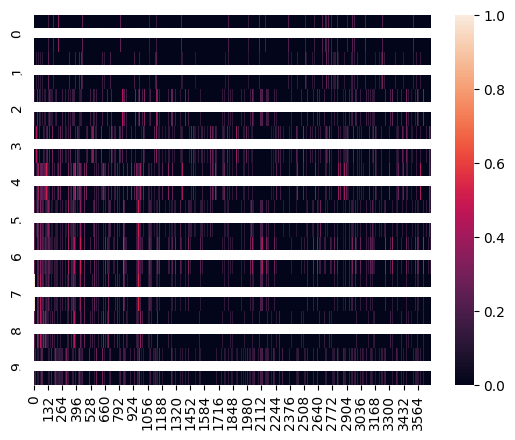

In [64]:
# PLOTTING ITS HEATMAP
#import seaborn as sns
#sns.heatmap(cosine_sim_mat[0:10], annot = True)

In [66]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,clean_course_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,Complete GST Course Certification Grow Your ...
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,Financial Modeling for Business Analysts and C...
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,Beginner to Pro Financial Analysis in Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,How To Maximize Your Profits Trading Options


In [67]:
# GETTING THE COURSE ID/INDEX and REMOVING THE DUPLICATES VALUES
course_indices = pd.Series(df.index, index = df['course_title']).drop_duplicates()
course_indices


,0
course_title,
Ultimate Investment Banking Course,0
Complete GST Course & Certification - Grow Your CA Practice,1
Financial Modeling for Business Analysts and Consultants,2
Beginner to Pro - Financial Analysis in Excel 2017,3
How To Maximize Your Profits Trading Options,4
...,...
Learn jQuery from Scratch - Master of JavaScript library,3678
How To Design A WordPress Website With No Coding At All,3679
Learn and Build using Polymer,3680


Through the output we get the course index/ id for the course title.


In [68]:
# Now to check whether the course id with is corresponding course is correct or not
course_indices['Learn and Build using Polymer']

3680

In [69]:
idx = course_indices['Learn and Build using Polymer']
idx

3680

Yes with the output we can conclude that yes our course index is perfectely showing the output with respect to its corresponding course_title.

In [70]:
scores = list(enumerate(cosine_sim_mat[idx]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.1690308509457033),
 (3, 0.0),
 (4, 0.0),
 (5, 0.0),
 (6, 0.15811388300841894),
 (7, 0.0),
 (8, 0.15811388300841894),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.1690308509457033),
 (13, 0.0),
 (14, 0.0),
 (15, 0.14907119849998596),
 (16, 0.13483997249264842),
 (17, 0.0),
 (18, 0.0),
 (19, 0.0),
 (20, 0.0),
 (21, 0.0),
 (22, 0.0),
 (23, 0.0),
 (24, 0.0),
 (25, 0.0),
 (26, 0.0),
 (27, 0.0),
 (28, 0.3162277660168379),
 (29, 0.0),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.0),
 (36, 0.0),
 (37, 0.1690308509457033),
 (38, 0.14907119849998596),
 (39, 0.0),
 (40, 0.0),
 (41, 0.0),
 (42, 0.0),
 (43, 0.0),
 (44, 0.14907119849998596),
 (45, 0.0),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.13483997249264842),
 (51, 0.25819888974716115),
 (52, 0.0),
 (53, 0.0),
 (54, 0.0),
 (55, 0.15811388300841894),
 (56, 0.22360679774997896),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.0),
 (61, 0.0),
 (62, 0.0),
 (63, 0.15811388300841894),
 (64, 

In [71]:
# SORTING OUR SCORES AS PER COSINE SCORES
sorted_scores = sorted(scores, key = lambda x:x[1], reverse = True)
sorted_scores

[(3680, 0.9999999999999999),
 (2727, 0.50709255283711),
 (3042, 0.50709255283711),
 (3484, 0.50709255283711),
 (3560, 0.50709255283711),
 (3506, 0.47809144373375745),
 (3170, 0.47434164902525683),
 (3303, 0.47434164902525683),
 (3393, 0.47434164902525683),
 (2623, 0.4472135954999579),
 (3251, 0.4472135954999579),
 (3256, 0.4472135954999579),
 (2555, 0.44721359549995787),
 (3202, 0.44721359549995787),
 (3349, 0.44721359549995787),
 (2695, 0.4242640687119285),
 (3153, 0.4242640687119285),
 (3408, 0.4242640687119285),
 (3576, 0.4242640687119285),
 (1845, 0.40451991747794525),
 (3665, 0.40451991747794525),
 (1723, 0.39999999999999997),
 (2774, 0.39999999999999997),
 (2794, 0.39999999999999997),
 (1686, 0.3872983346207417),
 (2066, 0.3730019232961255),
 (890, 0.36514837167011077),
 (1587, 0.36514837167011077),
 (2169, 0.36514837167011077),
 (2273, 0.36514837167011077),
 (2352, 0.36514837167011077),
 (2533, 0.36514837167011077),
 (2608, 0.36514837167011077),
 (2942, 0.36514837167011077),
 (2

In [72]:
# SELECT COURSE INDICES
selected_course_indices = [i[0] for i in sorted_scores[1:]]
selected_course_indices

[2727,
 3042,
 3484,
 3560,
 3506,
 3170,
 3303,
 3393,
 2623,
 3251,
 3256,
 2555,
 3202,
 3349,
 2695,
 3153,
 3408,
 3576,
 1845,
 3665,
 1723,
 2774,
 2794,
 1686,
 2066,
 890,
 1587,
 2169,
 2273,
 2352,
 2533,
 2608,
 2942,
 2995,
 3072,
 3308,
 3358,
 3361,
 3386,
 3545,
 3613,
 312,
 533,
 737,
 1665,
 2024,
 2734,
 2897,
 3039,
 3270,
 3322,
 3474,
 3524,
 3577,
 3633,
 28,
 268,
 443,
 871,
 1231,
 1343,
 1460,
 1519,
 1555,
 1666,
 1743,
 2458,
 2490,
 2545,
 2565,
 2575,
 2769,
 2790,
 2837,
 2928,
 2967,
 3004,
 3046,
 3106,
 3111,
 3207,
 3302,
 3423,
 3439,
 3533,
 3535,
 3575,
 3600,
 3676,
 3682,
 1752,
 2115,
 2357,
 2507,
 2588,
 2595,
 2639,
 2658,
 2697,
 2760,
 2878,
 2900,
 2966,
 2973,
 3096,
 3107,
 3121,
 3163,
 3254,
 3330,
 3421,
 3514,
 3553,
 3557,
 3563,
 438,
 478,
 515,
 753,
 1395,
 1420,
 1517,
 1956,
 1990,
 2078,
 2153,
 2232,
 2350,
 2622,
 2645,
 2788,
 2947,
 2989,
 3044,
 3078,
 3084,
 3158,
 3185,
 3327,
 3463,
 346,
 923,
 942,
 2084,
 2253,
 

In [73]:
# SELECT COURSE SCORES
select_course_scores = [i[1] for i in sorted_scores[1:]]
select_course_scores

[0.50709255283711,
 0.50709255283711,
 0.50709255283711,
 0.50709255283711,
 0.47809144373375745,
 0.47434164902525683,
 0.47434164902525683,
 0.47434164902525683,
 0.4472135954999579,
 0.4472135954999579,
 0.4472135954999579,
 0.44721359549995787,
 0.44721359549995787,
 0.44721359549995787,
 0.4242640687119285,
 0.4242640687119285,
 0.4242640687119285,
 0.4242640687119285,
 0.40451991747794525,
 0.40451991747794525,
 0.39999999999999997,
 0.39999999999999997,
 0.39999999999999997,
 0.3872983346207417,
 0.3730019232961255,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.36514837167011077,
 0.3380617018914066,
 0.3380617018914066,
 0.3380617018914066,
 0.3380617018914066,
 0.3380617018914066,
 0.33806170189

In [75]:
# CREATING A DATAFRAME FOR RECOMMENDATION RESULT
recommended_result = df['course_title'].iloc[selected_course_indices]
recommended_result

,course_title
2727,Learn to Build Websites using Twitter Bootstrap
3042,Learn to Build Web Apps using D3JS
3484,Learn To Build Apps Using Play Framework
3560,"Learn animation using CSS3, Javascript and HTML5"
3506,Learn to build 20 websites and build 14 iOS9 a...
...,...
3671,XPATH :basics for beginners
3673,A how to guide in HTML
3674,Building Better APIs with GraphQL
3679,How To Design A WordPress Website With No Codi...


In [76]:
# CREATING A DATAFRAME OF RECOMMENDED RESULT
recommend_df = pd.DataFrame(recommended_result)
recommend_df.head()

,course_title
2727,Learn to Build Websites using Twitter Bootstrap
3042,Learn to Build Web Apps using D3JS
3484,Learn To Build Apps Using Play Framework
3560,"Learn animation using CSS3, Javascript and HTML5"
3506,Learn to build 20 websites and build 14 iOS9 a...


In [77]:
# PASSING THE similarity_scores TO THE 'recommend_df'
recommend_df['similarity_scores'] = select_course_scores
recommend_df

,course_title,similarity_scores
2727,Learn to Build Websites using Twitter Bootstrap,0.507093
3042,Learn to Build Web Apps using D3JS,0.507093
3484,Learn To Build Apps Using Play Framework,0.507093
3560,"Learn animation using CSS3, Javascript and HTML5",0.507093
3506,Learn to build 20 websites and build 14 iOS9 a...,0.478091
...,...,...
3671,XPATH :basics for beginners,0.000000
3673,A how to guide in HTML,0.000000
3674,Building Better APIs with GraphQL,0.000000
3679,How To Design A WordPress Website With No Codi...,0.000000


In [78]:
def recommend_course(title, num_of_rec = 10):
  # Workflow of the function
  # ID for the title
  idx = course_indices[title]
  # Course Index
  # Search inside cosine_sim_mat
  scores = list(enumerate(cosine_sim_mat[idx]))
  # Scores
  # sort Scores
  sorted_scores = sorted(scores, key = lambda x:x[1],reverse = True)
  # Recommned
  selected_course_indices = [i[0] for i in sorted_scores[1:]]
  # Use index 1 to get the similarity scores
  selected_course_scores = [i[1] for i in sorted_scores[1:]] # Changed this line
  result = df['course_title'].iloc[selected_course_indices]
  recommend_df = pd.DataFrame(result)
  recommend_df['similarity_scores'] = selected_course_scores
  return recommend_df.head(num_of_rec)

# Calling the recommend_course function.
recommend_course('Learn and Build using Polymer')

,course_title,similarity_scores
2727,Learn to Build Websites using Twitter Bootstrap,0.507093
3042,Learn to Build Web Apps using D3JS,0.507093
3484,Learn To Build Apps Using Play Framework,0.507093
3560,"Learn animation using CSS3, Javascript and HTML5",0.507093
3506,Learn to build 20 websites and build 14 iOS9 a...,0.478091
3170,Learn To Build A Google Map App Using Angular 2,0.474342
3303,Learn to Build Web Apps using Laravel Framework,0.474342
3393,Learn how to quickly build websites using Word...,0.474342
2623,Learn and Understand React,0.447214
3251,Learn and Understand AngularJS,0.447214


 # Exporting the Model:

In [79]:
# Exporting the model
import pickle
pickle.dump(df,open('df.pkl','wb'))
pickle.dump(cosine_sim_mat,open('similarity.pkl','wb'))
pickle.dump(course_indices,open('course_indices.pkl','wb'))
pickle.dump(count_vect,open('count_vect.pkl','wb'))


# Creating streamlit web applcaiton.



In [80]:
! pip install streamlit

In [81]:
! pip install pyngrok

In [100]:
%%writefile app.py

import streamlit as st
import pickle
import streamlit.components.v1 as staticmethod

# load EDA
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity, linear_kernel

# Loading our dataset
def load_data(data):
  df = pd.read_cdv(data)
  return df


# func.
# Vectorize + Cosine Similarity Matrix

def vectorize_text_to_cosine_mat(data):
  count_vect = CountVectorizer()
  cv_mat = count_vect.fit_transform(data)


  # Get cosine
  cosine_sim_mat = cosine_similarity(cv_mat)
  return cosine_sim_mat

# Recommendation System
@st.cache_data
def get_recommendation(title,cosine_sim_mat,df,num_of_rec =5):

  # indices of the course
  course_indices = pd.Series(df.index,index = df['course_title']).drop_duplicates()
  # Index of the course
  idx = course_indices[title]

  # look into the cosine matrix for that index
  sim_scores = list(enumerate(cosine_sim_mat[idx]))
  sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse =True)
  selected_course_indices = [i[0] for i in sim_scores[1:]]
  selected_course_courses = [i[0] for i in sim_scores[1:]]

  # Get dataframe and title
  result_df = df.iloc[selected_course_indices]
  result_df['similarity_scores']= selected_course_scores
  final_recommendation = result_df[['course_title', 'similarity_scores', 'url', 'price', 'num_subscribers']]
  return final_recommendation.head(num_of_rec)


# Search for Course
@st.cache_data
def search_term_if_not_found(term,df):
  result_df = df[df['course_title'].str.contains(term)]
  return result_df

# Doing some CSS Style to make it more presentable

RESULT_TEMP = """
<div style = "width:90%; height:100%; margin:1px; padding:5px; position:relative; border-radius:5px; border-bottom;
box-shadow:0 0 15px 5px #ccc; background-color; #a8f0c6;
border-left:5px solid #6c6c6c;">
<h4>{}</h4>
<p style = "color:blue;"><span style = "color:black;">Score:</span>{}</p>
<p style = "color:blue;"><span style = "color:black;">URL:</span><a href = "{}", target ="_blank">Link</a></p>
<p style = "color:blue;"><span style = "color:black;">Price:</span>{}</p>
<p style = "color:blue;"><span style = "color:black;">Number of Subscribers:</span>{}</p>

</div>
"""



def main():
  st.title("Course Recommendation WebApp")
  menu = ["Home", "Recommend", "About"]
  choice  = st.sidebar.selectbox("Menu",menu)

  df = load_data("data/udemy_courses_data.csv")
  if choice == "Home":
    st.subheader("Home")
    st.dataframe(df.head(10))


  elif choice =="Recommend":
    st.subheader("Recommend Courses")
    cosine_sim_mat = vectorize_text_to_cosine_mat(df['course_title'])
    search_term = st.text_input("Search")
    num_of_rec = st.sidebar.number_input("Number",4,30,7)
    if st.button("Recommend"):
      if search_term is not None:
        try:
          result = get_recommendation(search_term,cosine_sim_mat,df,num_of_rec)
          for row in result.iterrows():
            rec_title=row[1][0]
            rec_score=row[1][1]
            rec_url=row[1][2]
            rec_price=row[1][3]
            rec_sub=row[1][4]

            #st.write("Title : ", rec_title)
            stc.html(RESULT_TEMP.format(rec_title,rec_score,rec_url,rec_price,rec_num_sub),height=350)

        except:
          result = "OOPs, Not Found"
          st.warning(result)
          st.info("Suggested Options Include")
          result_df = search_term_if_not_found(search_term)
          st.dataframe(result_df)


    else:
      st.subheader("About")
      st.text("Built with Streamlit & Pandas")

  if __name__=='__main__':
    main()




Overwriting app.py


In [94]:
!ls

app.py		course_indices.pkl  sample_data     udemy_courses_data.csv
count_vect.pkl	df.pkl		    similarity.pkl


In [84]:
!ngrok config add-authtoken 2k9HAgiesPZ1PIgbDzEGx5kaFCk_2EkNxoUWmoYHgcemTXNHX

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [85]:
!ngrok authtoken 2k9HAgiesPZ1PIgbDzEGx5kaFCk_2EkNxoUWmoYHgcemTXNHX

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [86]:
from pyngrok import ngrok

In [90]:
!streamlit run app.py&>/dev/null&

In [107]:
!pgrep streamlit

In [106]:
from pyngrok import ngrok
!ngrok authtoken 2k9HAgiesPZ1PIgbDzEGx5kaFCk_2EkNxoUWmoYHgcemTXNHX
publ_url = ngrok.connect(8501,"http")
publ_url

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


<NgrokTunnel: "https://ee51-34-105-4-15.ngrok-free.app" -> "http://localhost:8501">